In [1]:
from classes.ex1_code import *
from classes.ex2_code import *
from  classes.ex3_code import *
import pandas as pd

<h1> Task  1 </h1>
<h2> 1.1 Find implied volatility

In [2]:
ex1a = BlaSchMet(200,210, 3, 0.05,0.01,'Put')
ex1a.set_goal(find_price=False,vol=0,find_vol=True,price=9.74)
ex1a.find_imp_vol(x_guess=0.0001)

0.12

<b> Answer: </b> The implied volatility is 12%. This means that the market has indirectly set the volatility of the stock to 12%.

<h2> 1.2 Find vega</h2> 

In [3]:
ex1b = BlaSchMet(200,210,3,0.05,0.01, 'Put')
ex1b.set_goal(find_price=True, vol=0.12, find_vol=False, price=0)
# ex1b.call_black_scholes()
ex1b.vega_calc()

1.2138772647796041

<b> Answer: </b> The vega for this option is 1.52.  This indicates that if the volatility increases by 1%, the option value will increase by 1.52.

<h2> 1.3 Iterate thorugh implied volatilities</h2>

In [4]:
df = pd.read_csv('data_ex1.csv')
del df['Unnamed: 2']
df.head(2)

,Strike,Last Price
0,100.0,0.01
1,105.0,0.01


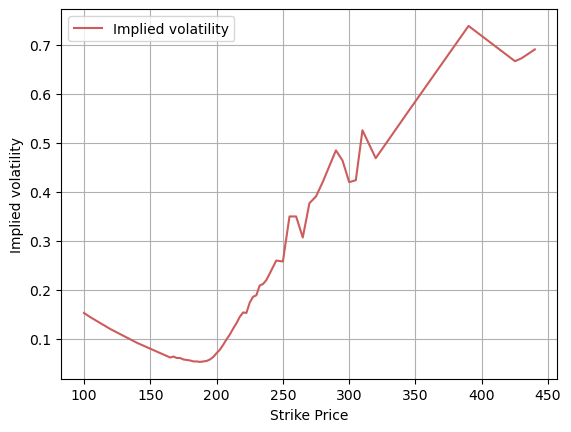

In [5]:
vol_list = []
for i in range(len(df)):
    ex1c = BlaSchMet(200,df['Strike'][i],3,0.05,0.01, 'Put')
    ex1c.set_goal(find_price=False, vol=None, find_vol=True, price=df['Last Price'][i])
    # ex1c.set_goal(find_price=False, vol=None, find_vol=True, price=9)
    vol = ex1c.find_imp_vol(x_guess=0.0001)
    vol_list.append(vol)


fig, ax = plt.subplots()
ax.plot(df['Strike'],vol_list, 
        label='Implied volatility',
        color='indianred')
ax.set_xlabel('Strike Price')
ax.set_ylabel('Implied volatility')
plt.grid()
plt.legend()
plt.show()

<b> Answer: </b> Looking at the graph one can observe that the implied volatility for the asset has a graph with many movements. One can see that when the strike price goes beyond 200, the  implied volatiltiy skyrockets. 

<h2> 1.4 Iterate thorugh vegas</h2>

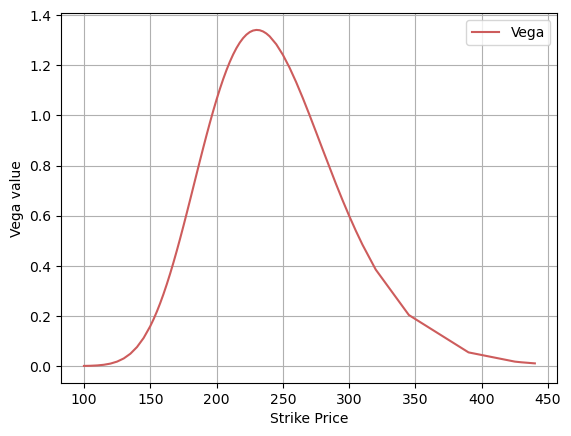

In [6]:
vega_list = []
for i in range(len(df)):
    ex1d = BlaSchMet(200,df['Strike'][i],3,0.05,0.01, 'Put')
    ex1d.set_goal(find_price=True, vol=0.12, find_vol=False, price=0)
    vega = ex1d.vega_calc()
    vega_list.append(vega)

fig, ax = plt.subplots()
ax.plot(df['Strike'],vega_list, 
        label='Vega', color='indianred')
ax.set_xlabel('Strike Price')
ax.set_ylabel('Vega value')
plt.grid()
plt.legend()
plt.show()
# plt.savefig('1d.PNG')

In [7]:
# test = BlaSchMet(200,250,3,0.05,0.01, 'Put')
# test.set_goal(find_price=False, vol=None, find_vol=True, price=32)
# # test.set_goal(find_price=False, vol=None, find_vol=True, price=0.01)
# test.find_imp_vol(x_guess=0.0001)
# # ex1b.call_black_scholes()
# test.vega_calc()

In [8]:
# testa = BlaSchMet(100,210,3,0.05,0.01, 'Put')
# testa.set_goal(find_price=False, vol=0.12, find_vol=False, price=0)
# # ex1b.call_black_scholes()
# testa.vega_calc()

<h4> Note to myself: </h4>
<p> The 1.3 plot seems weird, find out why? Furthermore, find similarities between vega and implied volatility.

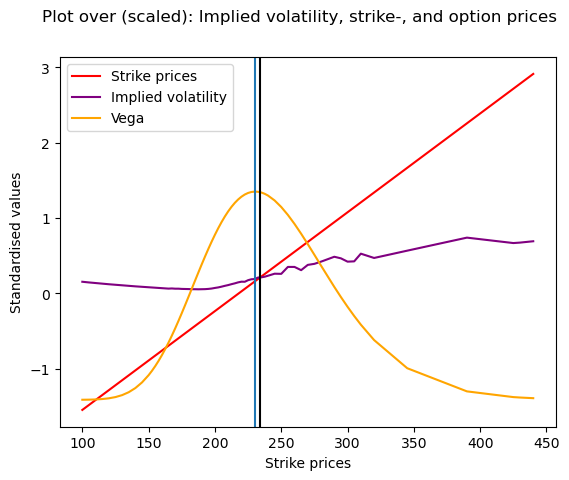

In [9]:
def scale(X):
    X = np.array(X)
    scaled = (X-X.mean())/X.std()
    # scaled = (X-min(X)) / (max(X)-min(X))
    return scaled


fig, ax = plt.subplots()
ax.plot(df['Strike'], scale(df['Strike']), label='Strike prices',color='r')
ax.plot(df['Strike'], vol_list, label='Implied volatility', color='purple')
ax.plot(df['Strike'], scale(vega_list), label='Vega', color='orange')
ax.axvline(234,color='black')
ax.axvline(df['Strike'][42])
# ax.set_xlim(220,240)
# ax.set_ylim(1.2,1.4)
ax.set_xlabel('Strike prices')
ax.set_ylabel('Standardised values')
fig.suptitle('Plot over (scaled): Implied volatility, strike-, and option prices')
plt.legend()
plt.show()

<h1> Task 2 </h1>
<h2> Task 2a </h2>

In [10]:
#BOPM call
ex2ai1 = BinPriMod(200,210,0.2,3,3,0.05,'Call','American',)
ex2ai1.set_dividends(cont=True, cont_rate=0.01, TD=None, amount=None)
ex2ai1.storage_values(False)
A_ex2ai1 = ex2ai1.storage_prices(True)[0][0]
#BOPM put
ex2ai2 = BinPriMod(200,210,0.2,3,3,0.05,'Put','American',)
ex2ai2.set_dividends(cont=True, cont_rate=0.01, TD=None, amount=None)
ex2ai2.storage_values(False)
A_ex2ai2 = ex2ai2.storage_prices(True)[0][0]
#BSM call
ex2aii1 = BlaSchMet(200,210,3,0.05,0.01,'Call')
ex2aii1.set_goal(find_price=True,vol=0.2,find_vol=False,price=None)
A_ex2aii1 = ex2aii1 .call_black_scholes()
#BSM put
ex2aii1 = BlaSchMet(200,210,3,0.05,0.01,'Put')
ex2aii1.set_goal(find_price=True,vol=0.2,find_vol=False,price=None)
A_ex2aii2 = ex2aii1.call_black_scholes()
pd.DataFrame({'BSM':[A_ex2aii1,A_ex2aii2],
              'BOPM':[A_ex2ai1, A_ex2ai2]}, index=['Call','Put'])

c:\Users\Jakob\anaconda3\lib\site-packages\numpy\lib\function_base.py:232: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  m = asarray(m)


,BSM,BOPM
Call,32.979069,38.81
Put,19.638638,25.47


<h2> Task 2b </h2>

In [12]:
ex2bPut  = LeaSquMonCar(200,210,3,0.2,0.05,0.01,'Put',100,10)
paths = ex2bPut.CreatePaths(post=True)
early_exercise = ex2bPut.LeastSquares(post=True)
coords = ex2bPut.PlotEarlyExercise()

n_exercises = len(coords[0])
total_npv = []
for i in range(len(coords[0])):
    pv_sel = coords[1][i]/(np.e**(0.05-0.01))**coords[0][i]
    total_npv.append(pv_sel)
value = sum(total_npv)/n_exercises
value

NameError: name 'np' is not defined

In [ ]:
ex2bCall  = LeaSquMonCar(200,210,3,0.2,0.05,0.01,'Call',100,10)
paths = ex2bCall.CreatePaths(post=True)
early_exercise = ex2bCall.LeastSquares(post=True)
coords = ex2bCall.PlotEarlyExercise()

n_exercises = len(coords[0])
total_npv = []
for i in range(len(coords[0])):
    pv_sel = coords[1][i]/(np.e**(0.05-0.01))**coords[0][i]
    total_npv.append(pv_sel)
value = sum(total_npv)/n_exercises
value

44.657532259252946

<h2> Task 2c

In [ ]:
ex2c = LeaSquMonCar(200, 210, 3, 0.2, 0.05, 0.01, 'Call', 10000, 660)
paths = ex2c.CreatePaths(post=True) 
early_exercise = ex2c.LeastSquares(post=True)
coords = ex2c.PlotEarlyExercise()

plt.figure()
plt.hist(coords[0], color='indianred',label='Early exercise' )
plt.xlabel('Exercises')
plt.ylabel('Frequency')
plt.grid()
plt.legend()
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

In [ ]:
np.where(coords[0]>=660)


<h2> Task 2d

In [ ]:
ex2d = LeaSquMonCar(200, 210, 3, 0.1, 0.05, 0.01, 'Call', 10000, 660)
paths = ex2d.CreatePaths(post=True) 
early_exercise = ex2d.LeastSquares(post=True)
coordsA = ex2d.PlotEarlyExercise()

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
ex2d = LeaSquMonCar(200, 210, 3, 0.2, 0.05, 0.01, 'Call', 10000, 660)
paths = ex2d.CreatePaths(post=True) 
early_exercise = ex2d.LeastSquares(post=True)
coordsB = ex2d.PlotEarlyExercise()

In [ ]:
ex2d = LeaSquMonCar(200, 210, 3, 0.3, 0.05, 0.01, 'Call', 10000, 660)
paths = ex2d.CreatePaths(post=True) 
early_exercise = ex2d.LeastSquares(post=True)
coordsC = ex2d.PlotEarlyExercise()

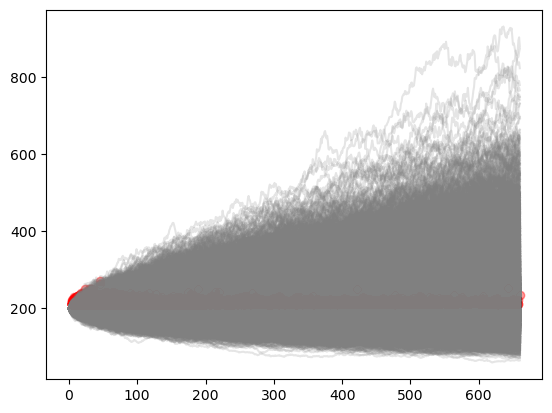

In [ ]:
fig, ax = plt.subplots()
ax.plot(paths, color='grey',alpha=.2)
# for i in range(paths.shape[1]):
#     ax.plot(paths[i], color='grey', alpha=0.2, zorder=0)
#Change strike,
ax.scatter(np.array(coords[0])+1,np.array(coords[1])+210, color='red', alpha=.4, zorder=1)
# for i in range(len(coords[0])):
#     ax.scatter(coords[0][i]+1, coords[1][i]+210, color='red',alpha=0.04, zorder=1)
# plt.xlim(-2,3)
# plt.ylim(195,210)

<AxesSubplot:>

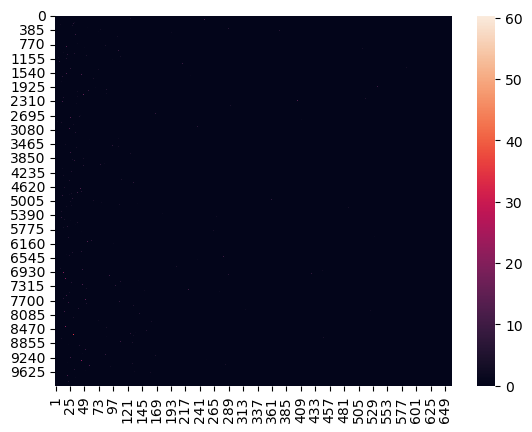

In [ ]:
sns.heatmap(early_exercise.iloc[:,1:-1])

In [ ]:
early_exercise

,0,1,2,3,4,5,6,7,8,9,10,id
0,200.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,200.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,200.0,18.671022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,200.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,200.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
995,200.0,6.508992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,995
996,200.0,3.557254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,996
997,200.0,13.527024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,997
998,200.0,23.612480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,998


<h1> Task 3

In [ ]:
# BinPriMod.help()

c:\Users\Jakob\anaconda3\lib\site-packages\numpy\lib\function_base.py:232: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  m = asarray(m)


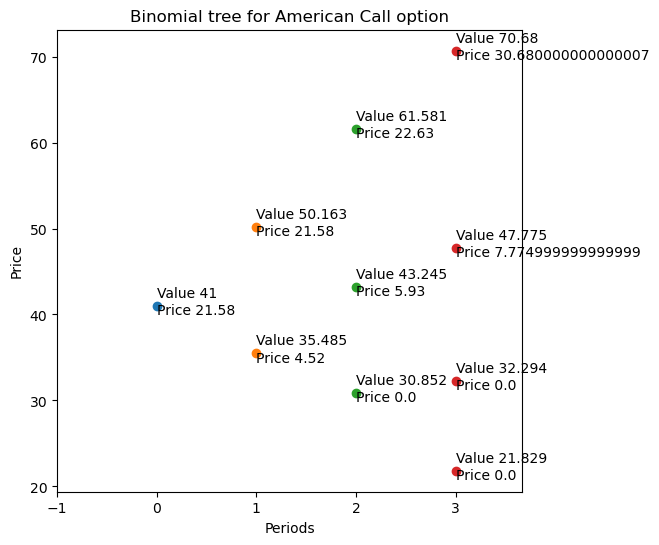

In [ ]:
myTree = BinPriMod(41, 40, 0.3392, 1, 0.3333, 0.08, 'Call', 'American')
myTree.set_dividends(cont=False, cont_rate=0, TD=8/12, amount=5)
myTree.storage_values(False)
myTree.storage_prices(False)
myTree.plot_tree(1)
